Podatki so shranjeni v dveh tabelah. Prva tabela vsebuje id restavracije, ime restavracije, mesto in državo, v kateri se restavracija nahaja, oceno restavracije od 1 do 5, število ocen in cenovni razred od 1 do 4. Druga tabela vsebuje id restavracije in njen tip. Podatke je potrebno shraniti v dveh različnih tabelah, ker ima lahko posamezna restavracija več različnih tipov.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
%matplotlib inline

restavracije = pd.read_csv('tabela_restavracij.csv')
tipi = pd.read_csv('tabela_tipov.csv')

In [2]:
restavracije

,id,Ime restavracije,Mesto,Država,Ocena,Število ocen,Cena
0,1,Adelaide Central Market,Adelaide,AUSTRALIA,4.5,77,1
1,2,Jamie’s Italian,Adelaide,AUSTRALIA,3.0,68,2
2,3,Bread & Bone Wood Grill,Adelaide,AUSTRALIA,4.0,52,2
3,4,Burger Theory,Adelaide,AUSTRALIA,3.5,45,1
4,5,Etica Ethical Pizzeria & Mozzarella Bar,Adelaide,AUSTRALIA,4.5,42,2
5,6,Press Food & Wine,Adelaide,AUSTRALIA,4.0,42,3
6,7,Hey Jupiter,Adelaide,AUSTRALIA,4.0,40,2
7,8,Cafe Troppo,Adelaide,AUSTRALIA,4.0,41,1
8,9,Coffee Branch,Adelaide,AUSTRALIA,4.5,38,1
9,10,Mandoo,Adelaide,AUSTRALIA,4.5,41,2


In [3]:
tipi

,id,Tip restavracije
0,1,Food Court
1,1,Fruits & Veggies
2,1,Health Markets
3,2,Italian
4,3,American (Traditional)
5,3,Burgers
6,4,Burgers
7,4,American (Traditional)
8,4,Street Vendors
9,5,Italian


Najprej nas zanima, katere restavracije so najboljše. Od restavracij, ki so dobile najvišjo možno oceno 5, si poglejmo najcenejše.

In [4]:
restavracije[(restavracije.Ocena == 5.0) & (restavracije['Število ocen'] > 50)].sort_values('Cena', ascending=True)

,id,Ime restavracije,Mesto,Država,Ocena,Število ocen,Cena
2790,2791,Juana La Cubana Cafe,Fort Lauderdale,FL,5.0,388,1
7260,7261,Blues City Deli,Saint Louis,MO,5.0,618,1
4057,4058,Manteigaria,Lisboa,PORTUGAL,5.0,145,1
4432,4433,Yummy Pollo,Louisville,KY,5.0,239,1
7195,7196,Pane & Vino,Roma,ITALY,5.0,80,1
9218,9219,King Mediterrano,Torrance,CA,5.0,728,1
6923,6924,King Mediterrano,Redondo Beach,CA,5.0,734,1
580,581,Aviva by Kameel,Atlanta,GA,5.0,708,2
9102,9103,Little Miss BBQ,Tempe,AZ,5.0,1116,2
9003,9004,Mocotó,São Paulo,BRAZIL,5.0,74,2


Vsaka restavracija spada v določen cenovni razred od 1 do 4 in vsak gost lahko oceni restavracijo z 1 do 5 zvezdicami. Zanima nas, ali cena restavracije vpliva na višino ocene. Za vsak cenovni razred izračunamo povprečno oceno.

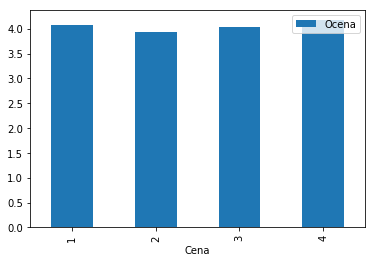

In [39]:
po_ceni = restavracije[['Ocena', 'Cena']].groupby('Cena').mean()
po_ceni.plot(kind='bar')

Zanima nas kateri tipi restavracij so najpogostejši:

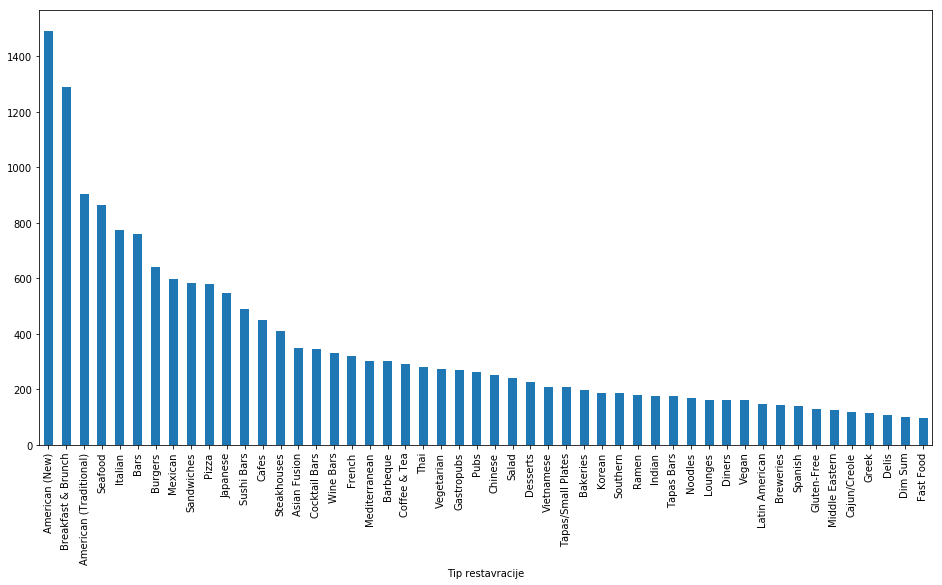

In [74]:
sestavljena = pd.merge(restavracije, tipi)
pogosti_tipi = tipi.groupby('Tip restavracije').size().sort_values(ascending=False)[:50].index
sestavljena_pogosti = sestavljena[sestavljena['Tip restavracije'].isin(pogosti_tipi)]
pogostost = sestavljena_pogosti.groupby('Tip restavracije').count()['id'].sort_values(ascending=False)
pogostost.plot.bar(x='Tip restavracije', figsize=(16,8))

Poleg tega nas zanima tudi zastopanost tipov v posameznih državah. Kateri tip restavracije je na primer v posamezni državi najbolj zastopan?

In [29]:
zastopanost_tipov = sestavljena.groupby(['Država', 'Tip restavracije']).size()
matrika_zastopanosti = zastopanost_tipov.unstack()
zastopanost = matrika_zastopanosti.idxmax(axis=1)
tabela_zastopanosti = pd.DataFrame({'Država':zastopanost.index, 'Tip':zastopanost.values})
tabela_zastopanosti

,Država,Tip
0,ARGENTINA,Argentine
1,AUSTRALIA,Bars
2,AUSTRIA,Austrian
3,AZ,American (New)
4,BELGIUM,Belgian
5,BRAZIL,Brazilian
6,CA,American (New)
7,CANADA,Canadian (New)
8,CHILE,Chilean
9,CO,American (New)


Restavracije so najdražje v Čilu in najcenejše na Japonskem.

(2, 2.6)

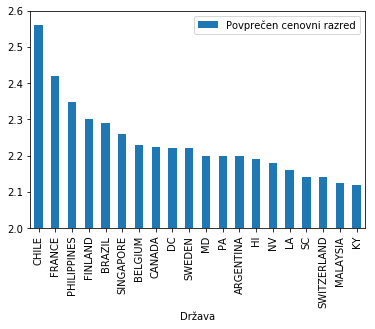

In [9]:
po_drzavah1 = restavracije.groupby('Država').mean()['Cena'].sort_values(ascending=False)[:20]
tabela_po_drzavah1 = pd.DataFrame({'Država':po_drzavah1.index, 'Povprečen cenovni razred':po_drzavah1.values})
tabela_po_drzavah1.plot.bar(x='Država').set_ylim([2,2.6])

(1.5, 2)

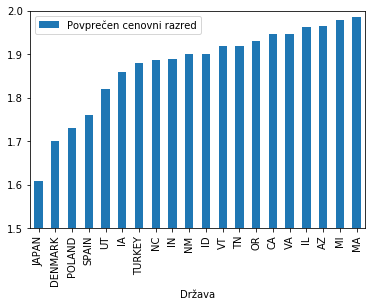

In [10]:
po_drzavah2 = restavracije.groupby('Država').mean()['Cena'].sort_values(ascending=True)[:20]
tabela_po_drzavah2 = pd.DataFrame({'Država':po_drzavah2.index, 'Povprečen cenovni razred':po_drzavah2.values})
tabela_po_drzavah2.plot.bar(x='Država').set_ylim([1.5,2])

 Najbolje so bile ocenjene na Japonskem, najslabše pa v ameriški zvezni državi New Jersey.

(4, 4.5)

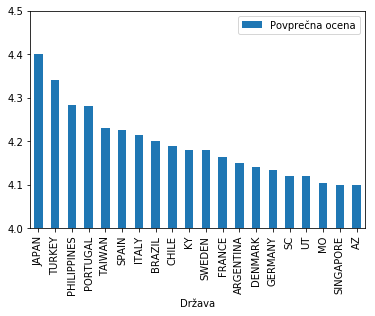

In [11]:
po_drzavah3 = restavracije.groupby('Država').mean()['Ocena'].sort_values(ascending=False)[:20]
tabela_po_drzavah3 = pd.DataFrame({'Država':po_drzavah3.index, 'Povprečna ocena':po_drzavah3.values})
tabela_po_drzavah3.plot.bar(x='Država').set_ylim([4,4.5])

(3.6, 4.1)

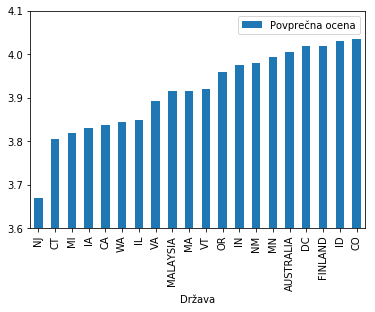

In [12]:
po_drzavah4 = restavracije.groupby('Država').mean()['Ocena'].sort_values(ascending=True)[:20]
tabela_po_drzavah4 = pd.DataFrame({'Država':po_drzavah4.index, 'Povprečna ocena':po_drzavah4.values})
tabela_po_drzavah4.plot.bar(x='Država').set_ylim([3.6,4.1])

Povprečne ocene pogostejših tipov restavracij:

(3.6, 4.2)

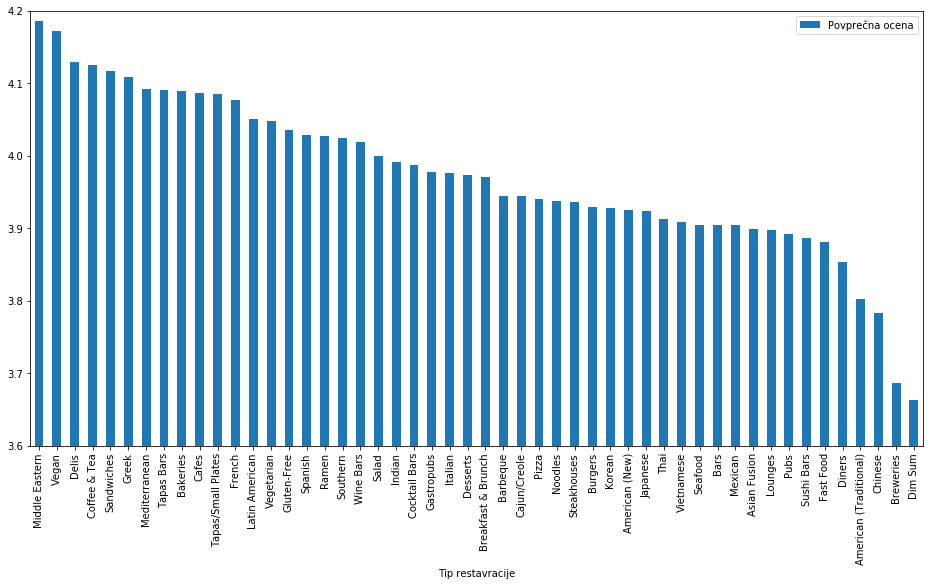

In [66]:
ocene_tipov = sestavljena_pogosti.groupby('Tip restavracije').mean()['Ocena'].sort_values(ascending=False)[:60]
tabela_ocen_tipov = pd.DataFrame({'Tip restavracije':ocene_tipov.index, 'Povprečna ocena':ocene_tipov.values})
tabela_ocen_tipov.plot.bar(x='Tip restavracije', figsize=(16,8)).set_ylim([3.6,4.2])

In [ ]:
Povprečni cenovni razredi pogostejših tipov restavracij:

(1, 2.9)

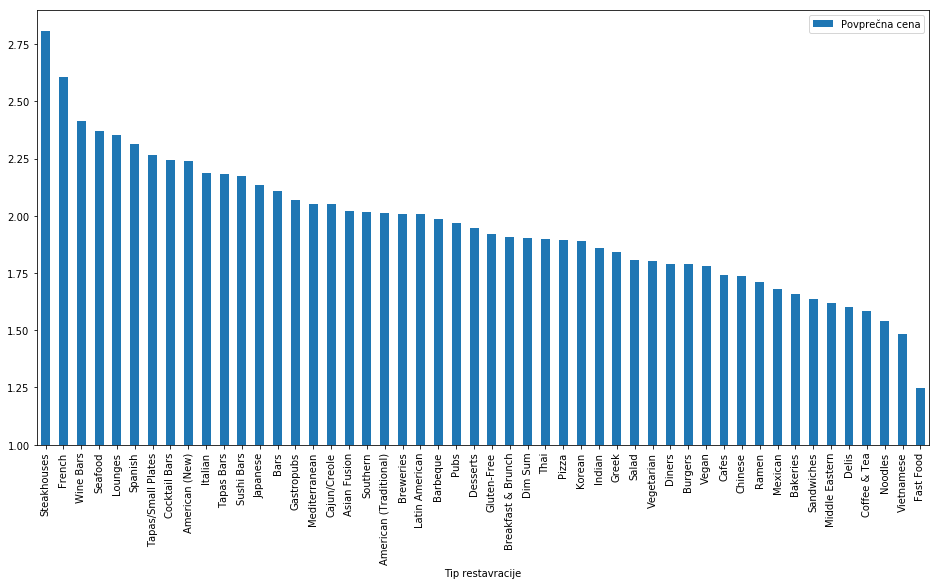

In [69]:
cenovni_razredi_tipov = sestavljena_pogosti.groupby('Tip restavracije').mean()['Cena'].sort_values(ascending=False)
tabela_cenovnih_razredov_tipov = pd.DataFrame({'Tip restavracije':cenovni_razredi_tipov.index, 'Povprečna cena':cenovni_razredi_tipov.values})
tabela_cenovnih_razredov_tipov.plot.bar(x='Tip restavracije', figsize=(16,8)).set_ylim([1,2.9])

Ordinatna os predstavlja število restavracij posameznega tipa, abscisna os pa povprečno oceno restavracij tega tipa restavracije. Vidimo, da so bili najpogostejši tipi ocenjeni z oceno okrog 3,9.

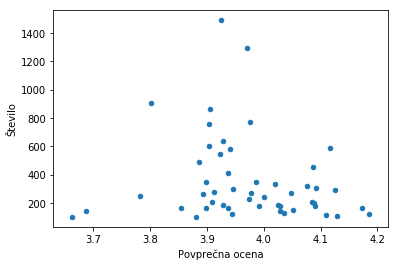

In [70]:
tabela_ocen_tipov = pd.DataFrame({'Tip restavracije':ocene_tipov.index, 'Povprečna ocena':ocene_tipov.values})
tabela_pogostosti = pd.DataFrame({'Tip restavracije':pogostost.index, 'Število':pogostost.values})
pd.merge(tabela_ocen_tipov, tabela_pogostosti).sort_values('Število', ascending=False).plot.scatter(x='Povprečna ocena', y='Število')